# Pandas: exploratory data analysis

### План:
* Типы переменных
* Работа с категориальными переменными
* Работа с датой и временем
* Пропущенные значения
* Обнаружение аномалий  

Также по ходу знакомимся с визуализацией, но подробнее об этом на следующей паре

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline 

## 1. Типы переменных

__Классификация переменных по типу данных:__  

* `int` $-$ числовой, целые числа (1000, 0, -1)
* `float` $-$ числовой, вещественные числа (1.0, 2.564523)
* `object` $-$ строковый (бутырка, JPMorgan, f12aaz//)
* `bool` $-$ булевский (True, False)
* `datetime` $-$ дата (2020-01-12, 23.Jan.20)


__Классификация переменных по смыслу:__  

* `Непрерывные` $-$ содержат непрерывное множество значений на каком-то промежутке (з/п, рост человека, вес буханки хлеба и тд)
* `Категориальные` $-$ содержат конечное небольшое множество значений (возраст детей, тип магазина)
* `Бинарные` $-$ подтип категориальной переменной, имеющей только 2 категории (пол, столицы двух стран)

Подгрузим датасет по **клипам ютуба** и посмотрим на типы наших переменных

In [3]:
# подгружаем данные
df = pd.read_csv("data/youtube_data_short.csv", sep = "\t")

In [4]:
# смотрим на типы переменных 
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

__Описание колонок:__

- `title` - название видео
- `commentCount` - число комментариев
- `dislikeCount` - число дизлайков
- `likeCount`  - число лайков
- `music_style` - музыкальный стиль
- `performer` - исполнитель
- `viewCount` - число просмотров
- `commentators_uniq` - число уникальных комментаторов
- `comments_obscene_cnt` - число комментариев
- `video_age` - возраст видео в днях

Возраст видео посчитан в днях относительно `2019-03-15` (момент, когда данные собирались вот этим крутым дата-шрушером: https://github.com/FUlyankin).

## 2. Работаем с категориальными переменными

### Когда категории две:

Отберем только клипы жанра `rock` и `rap`. Представим, что только они нас интересуют. 

In [27]:
genres_to_keep = ['rock', 'rap']

df_small = df[df.music_style.isin(genres_to_keep)]
df_small.head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
8,"""Hey Tovarish"" Video Shooting",10.0,1.0,34.0,rock,мумий_тролль,3815.0,9.0,0.0,2539
15,"""SOS Матросу!"" - тизер фильма",10.0,4.0,68.0,rock,мумий_тролль,7632.0,5.0,0.0,1739
36,"""ВОИН ДУМА""",4.0,0.0,49.0,rock,король_и_шут,1950.0,NaN,NaN,3819
38,"""Виктор Цой. 50 лет"" Кукрыниксы - Печаль, Конч...",2.0,4.0,65.0,rock,кукрыниксы,9986.0,2.0,0.0,2351
40,"""Всё, что было"". Начало.",23.0,5.0,171.0,rock,ария,11168.0,21.0,1.0,2351


В таком "поддатафрейме" наша колонка `music_style` **имеет тип object** (т.к. в ней находятся строки), а также **является бинарной**, так как содержит всего два значения (`rock` и `rap`)

Однако проблема строковых переменных в том, что многие модели не умеют с ними работать. Компьютеру привычнее оперировать с числами. 

Именно поэтому над строковыми бинарными переменными производят нехитрые манипуляции. Либо кодируют их в числа 1 / 0, либо создают булевский тип True / False, что в какой-то степени тоже самое. 

Попробуем преобразовать нашу бинарную строковую переменную music_style:

In [28]:
d = {'rock': 1, 'rap': 0}

df_small['is_rock'] = df_small['music_style'].map(d)

<ipython-input-28-21b19c4d8243>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small['is_rock'] = df_small['music_style'].map(d)


In [30]:
df_small.head(2)

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age,is_rock
8,"""Hey Tovarish"" Video Shooting",10.0,1.0,34.0,rock,мумий_тролль,3815.0,9.0,0.0,2539,1
15,"""SOS Матросу!"" - тизер фильма",10.0,4.0,68.0,rock,мумий_тролль,7632.0,5.0,0.0,1739,1


**Задача:** Какая доля наблюдений обоих жанров?

In [ ]:
## Ваш код

### Когда категорий больше двух

Вернемся к нашему полному датафрейму. В нем music_style принимает не 2 значения, а целых 7. Что делать в таком случае?

**Наивный метод:** Давайте каждому значению из music_style сопоставим какое-нибудь число. Заранее подумайте, какие проблемы может создать такой способ?

In [33]:
df.music_style.unique()

array(['popsa', 'rock', 'classic', 'indi', 'estrada', 'shanson', 'rap'],
      dtype=object)

In [44]:
# создадим словарь
d = dict(zip(df.music_style.unique(), np.arange(7)))
print(d)

# сделаем преобразование
df['music_style_int'] = df['music_style'].map(d)

{'popsa': 0, 'rock': 1, 'classic': 2, 'indi': 3, 'estrada': 4, 'shanson': 5, 'rap': 6}


Однако проблема такого способа в том, что мы непроизвольным образом установили **порядок** на наших категориях:
$6 > 5 > 4 > 3 > 2 > 1 > 0 \Rightarrow rap > shanson > estrada > indi > classic > rock > popsa$ 


Чтобы такого избежать, чаще используется другой метод: **One Hot Encoding**

<img src="images/ris1.png" width="600">

В pandas такое преобразование можно сделать с помощью функции `get_dummies()`

In [47]:
pd.get_dummies(df['music_style']).head()

,classic,estrada,indi,popsa,rap,rock,shanson
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


Такой метод тоже имеет свои проблемы, которые выходят за рамки нашего курса. Например, это полная мультиколлинеарность (или линейная зависимость) столбцов. Подробнее об этом можно посмотреть здесь: https://www.youtube.com/watch?v=k9PPuTmTLMk

## 3. Работа со временем

Тип данных Datetime или Timestamp в python позволяет очень удобно оперировать с переменными, имеющие формат даты или даты и времени. Это специальные объекты, над которыми установлены свои полезные методы. Например, из даты мы можем доставать месяц, день, год или даже часовой пояс. Посмотрим на примерах:

В нашем датасете есть колонка `video_age`, которая показывает нам возраст нашего клипа в днях с 15 марта 2019 года. Попробуем получить из нее дату публикации клипа:

In [50]:
# создаем дату от которой будем делать отсчет
date_finish = pd.to_datetime('2019-03-15')

In [58]:
# вычитаем дни: для этого пользуемся timedelta
from datetime import timedelta

date_finish-timedelta(days=1)

Timestamp('2019-03-14 00:00:00')

In [60]:
# делаем для каждого значения в колонке video_age
df['Publication_date'] = df['video_age'].apply(lambda x: (date_finish - timedelta(days=x)))

In [61]:
# посмотрим теперь на типы наших переменных
df.dtypes

title                           object
commentCount                   float64
dislikeCount                   float64
likeCount                      float64
music_style                     object
performer                       object
viewCount                      float64
commentators_uniq              float64
comments_obscene_cnt           float64
video_age                        int64
music_style_int                  int64
Publication_date        datetime64[ns]
dtype: object

In [73]:
# теперь можем достать только год публикации, например:
df['Publication_date'].dt.year

0        2016
1        2010
2        2009
3        2010
4        2009
         ... 
19119    2019
19120    2018
19121    2018
19122    2016
19123    2019
Name: Publication_date, Length: 19124, dtype: int64

Посмотрим на распределение клипов по годам:

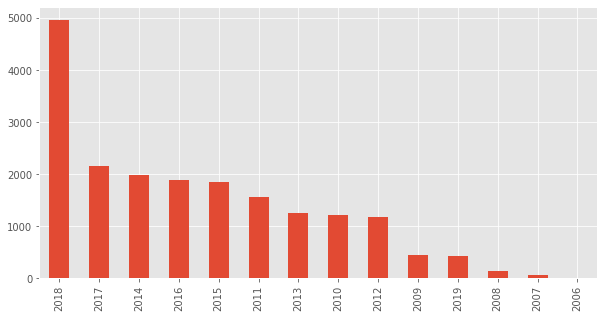

In [75]:
df['Year'] = df['Publication_date'].dt.year

df.Year.value_counts().plot(kind='bar', figsize=(10, 5));

## 4. Пропущенные значения

Пропуски в данных $-$ это противная проблема, с которой можно столкнуться при работе. Пропуски возникают практически всегда. Причинами пропусков может быть, например, технические возможности вашего парсера, который не смог достать часть информации из сайта, либо, например, если вы Юрий Дудь и опрашиваете людей об их заработке, собирая статистику для дальнейшего исследования, то вряд ли каждый человек захочет вам ответить. 

### Выявление

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19124 entries, 0 to 19123
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   title                 19124 non-null  object        
 1   commentCount          18914 non-null  float64       
 2   dislikeCount          18850 non-null  float64       
 3   likeCount             18850 non-null  float64       
 4   music_style           19124 non-null  object        
 5   performer             19124 non-null  object        
 6   viewCount             19123 non-null  float64       
 7   commentators_uniq     12314 non-null  float64       
 8   comments_obscene_cnt  12314 non-null  float64       
 9   video_age             19124 non-null  int64         
 10  music_style_int       19124 non-null  int64         
 11  Publication_date      19124 non-null  datetime64[ns]
 12  Year                  19124 non-null  int64         
dtypes: datetime64[ns

In [86]:
df.isnull().sum()

title                      0
commentCount             210
dislikeCount             274
likeCount                274
music_style                0
performer                  0
viewCount                  1
commentators_uniq       6810
comments_obscene_cnt    6810
video_age                  0
music_style_int            0
Publication_date           0
Year                       0
dtype: int64

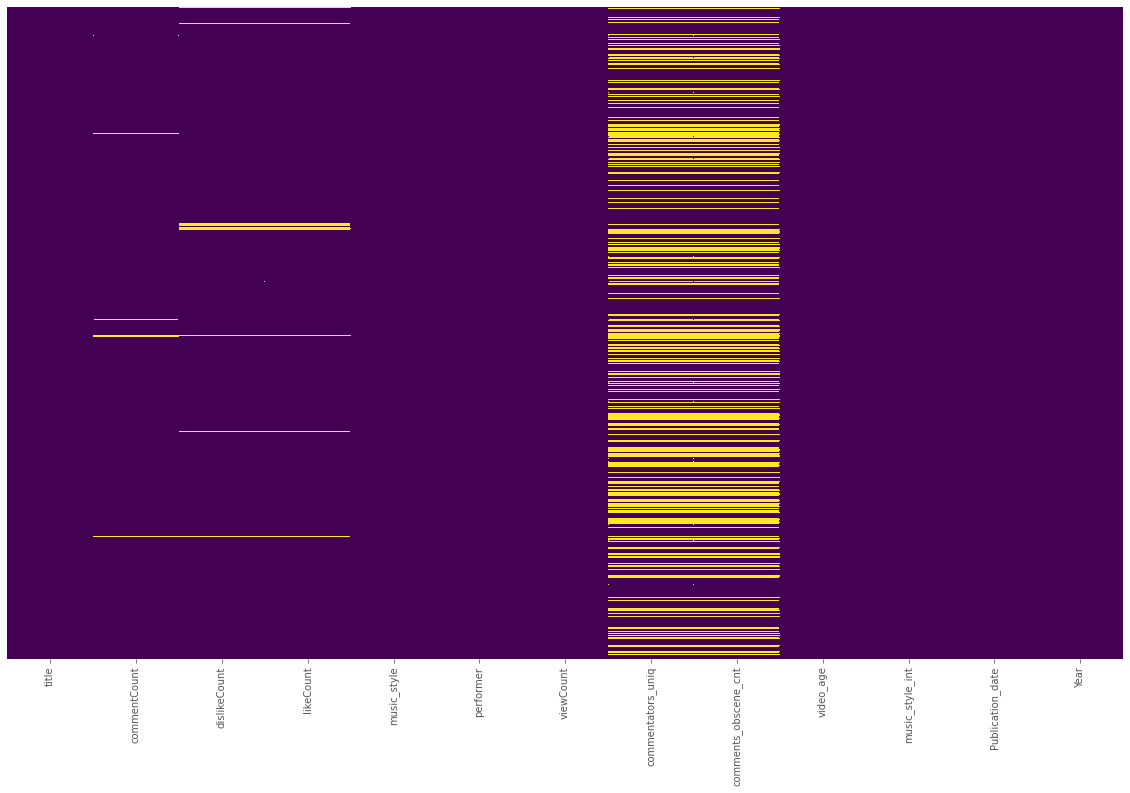

In [103]:
fig, ax = plt.subplots(figsize=(20,12))
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Удаление

In [89]:
print(df.shape)

# по умолчанию удаляет строки, где есть na
print(df.dropna().shape)

# можем удалять столбцы, где есть хотя бы один пропуск
print(df.dropna(axis=1).shape)

(19124, 13)
(12116, 13)
(19124, 7)


Часто удаление слишком дорогая операция, так как избавляемся от кучи данных, которых и так частенько бывает мало

### Заполнение

In [96]:
# было
df.commentators_uniq.head()

0    24.0
1     NaN
2    23.0
3    11.0
4    33.0
Name: commentators_uniq, dtype: float64

In [97]:
# заполняем нулем
df.commentators_uniq.fillna(0).head()

0    24.0
1     0.0
2    23.0
3    11.0
4    33.0
Name: commentators_uniq, dtype: float64

In [98]:
# заполняем предыдущим значением
df.commentators_uniq.fillna(method='ffill').head()

0    24.0
1    24.0
2    23.0
3    11.0
4    33.0
Name: commentators_uniq, dtype: float64

In [99]:
# заполняем последующим значением
df.commentators_uniq.fillna(method='bfill').head()

0    24.0
1    23.0
2    23.0
3    11.0
4    33.0
Name: commentators_uniq, dtype: float64

Можем заполнить средним значением по столбцу:

In [102]:
df.commentators_uniq.fillna(df.commentators_uniq.mean()).head()

0     24.000000
1    131.594608
2     23.000000
3     11.000000
4     33.000000
Name: commentators_uniq, dtype: float64

## 5. Аномалии в данных 

Аномалии в данных $-$ это столь же частая проблема, что и пропущенные значения, однако более серьезная. Посмотрим на примере, как аномалии могут все испортить:  

### Оцениваем средний рост людей в школьном классе:

Представим, что мы хотим оценить средний рост людей в школьном классе. Имеем следующую таблицу:

In [78]:
students = pd.DataFrame({'student': ['Max', 'Ahmed', 'Nastya', 'Vlad'],
                        'height_cm': [170, 165, 171, 168]})

students

,student,height_cm
0,Max,170
1,Ahmed,165
2,Nastya,171
3,Vlad,168


Найдем среднее:

In [79]:
students.height_cm.mean()

168.5

Теперь представим, что в наш класс пришел новенький Филипп, который остался на второй год из-за того, что играл в баскетбол, а не учился. У нас в таблице появилось новое наблюдение, попробуем оценить рост теперь. 

In [81]:
students.loc[4] = ['Phil', 210]
students

,student,height_cm
0,Max,170
1,Ahmed,165
2,Nastya,171
3,Vlad,168
4,Phil,210


In [82]:
students.height_cm.mean()

176.8

Видим, что значение среднего роста *сильно изменилось* из-за одного человека, имеющего неспецифичный (*аномальный*) рост для нашей выборки. Связано это с тем, что Филипп пришел к нам в класс *из другого распределения* $-$ распределения баскетболистов. Именно поэтому значение нашего среднего теперь *сильно завышено*, и мы таким образом можем собрать *ошибочную статистику*.

Возможное решение: использовать для агрегированной статистики квантили (например, медиану)

In [84]:
students.height_cm.median()

170.0

**ЗАПОМНИТЬ: Медиана в отличие от среднего устойчива к выбросам!**

### Выявление и удаление выбросов на примере клипов:

In [104]:
df.likeCount.mean()

5735.014482758621

In [105]:
df.likeCount.median()

100.0

Видим сильное завышение среднего по лайкам в отличие от медианы. Причина - аномалии. 

На распределении виден длинный хвост:

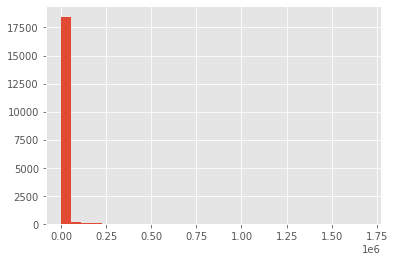

In [128]:
df.likeCount.hist(bins=30);

То есть у нас в выборке есть клипы с аномальным кол-вом лайков - так называемые хиты. Они то нам и портят всю статистику.  

Попробуем от них избавиться:

**Способ №1:** Откинем $1\%$ нашей выборки клипов, у которых больше всего лайков. Воспользуемся для этого $99\%$ персентилем.

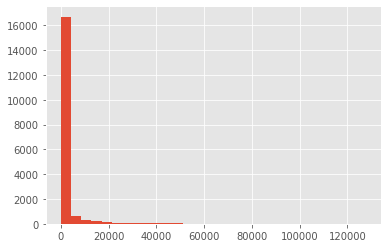

In [127]:
threshold = df.likeCount.quantile(0.99)
df_clear = df[df.likeCount <= threshold]

# визуализируем
df_clear.likeCount.hist(bins=30);

**Способ №2:** Межквартильное отклонение. Всё, что оказалось за пределами трёх межквартильных отклонений - аномалия. 

In [123]:
def outlier_iqr(data, col, threshold = 3):
    
    # интерквантильный размах
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    
    # насколько размахов отступать 
    up_bound = data[col].quantile(0.75) + (IQR * threshold)
    low_bound = data[col].quantile(0.25) - (IQR * threshold)
    
    anomalies = pd.concat([data[col]>up_bound, data[col]<low_bound], axis=1).any(axis=1)
    return anomalies

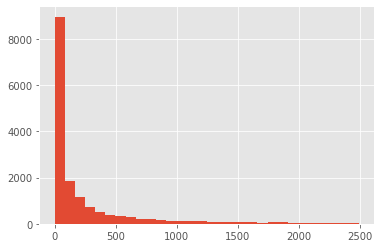

In [129]:
df[~outlier_iqr(df, 'likeCount')].likeCount.hist(bins=30);

Стоит отметить, что иногда искать аномалии требуется не только для обработки данных. Порой, поиск аномалий $-$ это и есть задача. Так, например, аномалиями являются мошенники банка, чье поведение отличается от обычных пользователей. И поиск таких людей и является нашей задачей. 